# Регуляризация линейной регрессии. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии с регуляризацией на реальных данных.

## Что входит в практическую работу

1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ, сконструировать новые признаки.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью библиотеки Scikit-learn.
5. Подобрать коэффициенты регуляризации.
6. Получить качество модели с помощью MSE, MAE, $R^2$.
7. Ответить на вопросы в конце блокнота.

## Что оценивается 

- Выполнены все этапы работы.
- Подобраны коэффициенты регуляризации.
- Сделан вывод по результатам.
- Модель не переобучена.
- Получена модель хорошего качества.
- Сделаны выводы в конце блокнота.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задания.

## Задача

С набором данных вы уже знакомы из прошлого модуля — это данные по продажам домов. В этот раз признаков будет чуть больше, чтобы вам было интереснее. Краткое описание признаков:

* **LotArea** — размер участка в квадратных футах.
* **LotArea_M** — размер участка в квадратных метрах.
* **Street** — тип доступа к дороге.
* **BldgType** — тип жилья.
* **OverallQual** — общее качество материала и отделки.
* **OverallCond** — общая оценка состояния.
* **YearBuilt** — первоначальная дата постройки.
* **YearRemodAdd** — дата реконструкции.
* **RoofStyle** — тип крыши.
* **ExterQual** — качество материалов снаружи.
* **ExterCond** — текущее состояние материалов снаружи.
* **Foundation** — тип фундамента.
* **TotalBsmtSF** — общая площадь подвала в квадратных футах.
* **TotalBsmtSF_M** — общая площадь подвала в квадратных метрах.
* **Heating** — тип отопления.
* **HeatingQC** — качество и состояние отопления.
* **CentralAir** — кондиционирование.
* **GrLivArea** — жилая площадь в квадратных футах.
* **GrLivArea_M** — жилая площадь в квадратных метрах.
* **Bath** — количество ванных комнат.
* **KitchenQual** — качество кухни.
* **GarageArea** — площадь гаража в квадратных футах.
* **GarageArea_M** — площадь гаража в квадратных метрах.
* **DateSold** — месяц и год продажи.
* **SaleCondition** — условия сделки.
* **SalePrice** — стоимость продажи в долларах. Это целевая переменная, которую нам нужно предсказать.

Постройте модель линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE, $R^2$. Определите, что модель не переобучилась.

доп материалы
https://medium.com/@Radiologist/l1-%D0%B8-l2-%D1%80%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F-f6891b354507

## Задание 1 

Подключите необходимые библиотеки.

In [227]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

import seaborn as sns

In [228]:
pd.options.display.max_columns = None

## Задание 2

Считайте данные и посмотрите на несколько строк.

In [229]:
data_df = pd.read_csv('data.csv')
data_df

LotArea    LotArea_M Street BldgType  OverallQual  OverallCond  \
0        8450   785.030350   Pave     1Fam            7            5   
1        9600   891.868800   Pave     1Fam            6            8   
2       11250  1045.158750   Pave     1Fam            7            5   
3        9550   887.223650   Pave     1Fam            7            5   
4       14260  1324.796780   Pave     1Fam            8            5   
...       ...          ...    ...      ...          ...          ...   
1455     7917   735.513051   Pave     1Fam            6            5   
1456    13175  1223.997025   Pave     1Fam            6            6   
1457     9042   840.028926   Pave     1Fam            7            9   
1458     9717   902.738451   Pave     1Fam            5            6   
1459     9937   923.177111   Pave     1Fam            5            6   

      YearBuilt  YearRemodAdd RoofStyle ExterQual ExterCond Foundation  \
0          2003          2003     Gable        Gd        TA      PConc   
1          1976          1976     Gable        TA        TA     CBlock   
2          2001          2002     Gable        Gd        TA      PConc   
3          1915          1970     Gable        TA        TA     BrkTil   
4          2000          2000     Gable        Gd        TA      PConc   
...         ...           ...       ...       ...       ...        ...   
1455       1999          2000     Gable        TA        TA      PConc   
1456       1978          1988     Gable        TA        TA     CBlock   
1457       1941          2006     Gable        Ex        Gd      Stone   
1458       1950          1996       Hip        TA        TA     CBlock   
1459       1965          1965     Gable        Gd        TA     CBlock   

      TotalBsmtSF  TotalBsmtSF_M Heating HeatingQC CentralAir  GrLivArea  \
0             856      79.524968    GasA        Ex          Y       1710   
1            1262     117.243586    GasA        Ex          Y       1262   
2             920      85.470760    GasA        Ex          Y       1786   
3             756      70.234668    GasA        Gd          Y       1717   
4            1145     106.373935    GasA        Ex          Y       2198   
...           ...            ...     ...       ...        ...        ...   
1455          953      88.536559    GasA        Ex          Y       1647   
1456         1542     143.256426    GasA        TA          Y       2073   
1457         1152     107.024256    GasA        Ex          Y       2340   
1458         1078     100.149434    GasA        Gd          Y       1078   
1459         1256     116.686168    GasA        Gd          Y       1256   

      GrLivArea_M  Bath KitchenQual  GarageArea  GarageArea_M DateSold  \
0      158.864130     3          Gd         548     50.910844   2/2008   
1      117.243586     2          TA         460     42.735380   5/2007   
2      165.924758     3          Gd         608     56.485024   9/2008   
3      159.514451     1          Gd         642     59.643726   2/2006   
4      204.200794     3          Gd         836     77.666908  12/2008   
...           ...   ...         ...         ...           ...      ...   
1455   153.011241     3          TA         460     42.735380   8/2007   
1456   192.587919     2          TA         500     46.451500   2/2010   
1457   217.393020     2          Gd         252     23.411556   5/2010   
1458   100.149434     1          Gd         240     22.296720   4/2010   
1459   116.686168     2          TA         276     25.641228   6/2008   

     SaleCondition  SalePrice  
0           Normal     208500  
1           Normal     181500  
2           Normal     223500  
3          Abnorml     140000  
4           Normal     250000  
...            ...        ...  
1455        Normal     175000  
1456        Normal     210000  
1457        Normal     266500  
1458        Normal     142125  
1459        Normal     147500  

[1460 rows x 26 columns]

## Задание 3 

Проведите разведочный анализ:

1. Выведите описательные статистики для числовых признаков.

In [230]:
display(data_df.dtypes)
data_df.describe(include=['int', 'float'])

LotArea            int64
LotArea_M        float64
Street            object
BldgType          object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
ExterQual         object
ExterCond         object
Foundation        object
TotalBsmtSF        int64
TotalBsmtSF_M    float64
Heating           object
HeatingQC         object
CentralAir        object
GrLivArea          int64
GrLivArea_M      float64
Bath               int64
KitchenQual       object
GarageArea         int64
GarageArea_M     float64
DateSold          object
SaleCondition     object
SalePrice          int64
dtype: object

LotArea     LotArea_M  OverallQual  OverallCond    YearBuilt  \
count    1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean    10516.828082    977.044879     6.099315     5.575342  1971.267808   
std      9981.264932    927.289456     1.382997     1.112799    30.202904   
min      1300.000000    120.773900     1.000000     1.000000  1872.000000   
25%      7553.500000    701.742811     5.000000     5.000000  1954.000000   
50%      9478.500000    880.581085     6.000000     5.000000  1973.000000   
75%     11601.500000   1077.814155     7.000000     6.000000  2000.000000   
max    215245.000000  19996.906235    10.000000     9.000000  2010.000000   

       YearRemodAdd  TotalBsmtSF  TotalBsmtSF_M    GrLivArea  GrLivArea_M  \
count   1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    1984.865753  1057.429452      98.238368  1515.463699   140.791124   
std       20.645407   438.705324      40.757041   525.480383    48.818704   
min     1950.000000     0.000000       0.000000   334.000000    31.029602   
25%     1967.000000   795.750000      73.927562  1129.500000   104.933938   
50%     1994.000000   991.500000      92.113325  1464.000000   136.009992   
75%     2004.000000  1298.250000     120.611320  1776.750000   165.065405   
max     2010.000000  6110.000000     567.637330  5642.000000   524.158726   

              Bath   GarageArea  GarageArea_M      SalePrice  
count  1460.000000  1460.000000   1460.000000    1460.000000  
mean      1.947945   472.980137     43.941274  180921.195890  
std       0.794965   213.804841     19.863111   79442.502883  
min       0.000000     0.000000      0.000000   34900.000000  
25%       1.000000   334.500000     31.076054  129975.000000  
50%       2.000000   480.000000     44.593440  163000.000000  
75%       3.000000   576.000000     53.512128  214000.000000  
max       4.000000  1418.000000    131.736454  755000.000000

2. Постройте матрицу корреляций числовых признаков. Удалите линейно-зависимые признаки из данных.

In [231]:
digit_cols_view = data_df.select_dtypes(include=['int','float'])

In [232]:
sns.set (rc = {'figure.figsize':(20, 20)})

sns.heatmap(digit_cols_view.corr(), annot = True)

<Axes: >

In [233]:
# Изучив тепловую карту можно сделать вывод что линейная зависимость наиболее ярко выражена у признаков 'GrLivArea', 'GrLivArea_M' и 'OverallQual'. Удалим их согласно заданию
data_df.drop(columns=['GrLivArea', 'GrLivArea_M' ,'OverallQual'], axis=1, inplace=True)
digit_cols_view = data_df.select_dtypes(include=['int','float'])

3. Посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной.

In [234]:
cols = [cl for cl in digit_cols_view.columns.to_list() if cl != 'SalePrice']
cols

['LotArea',
 'LotArea_M',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 'TotalBsmtSF_M',
 'Bath',
 'GarageArea',
 'GarageArea_M']

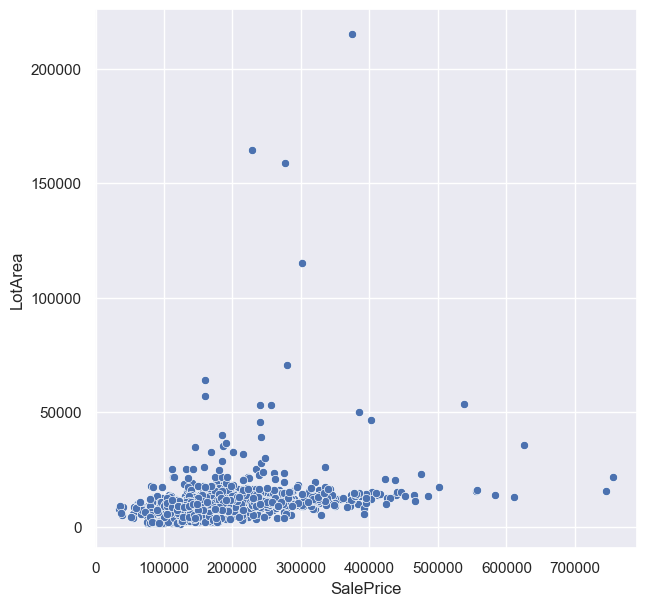

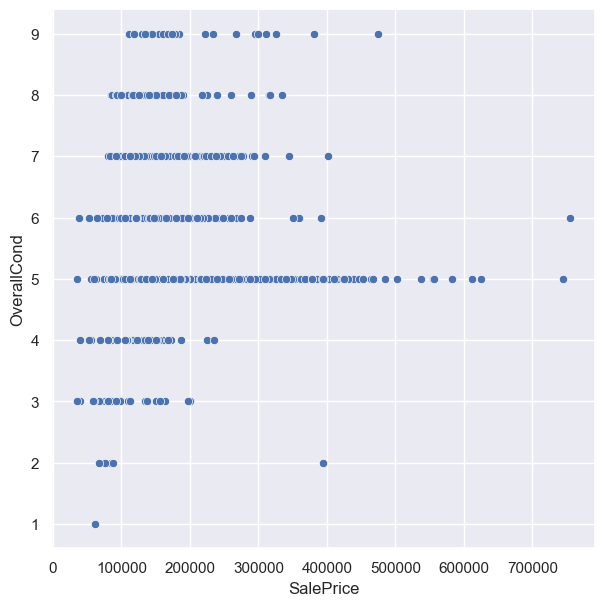

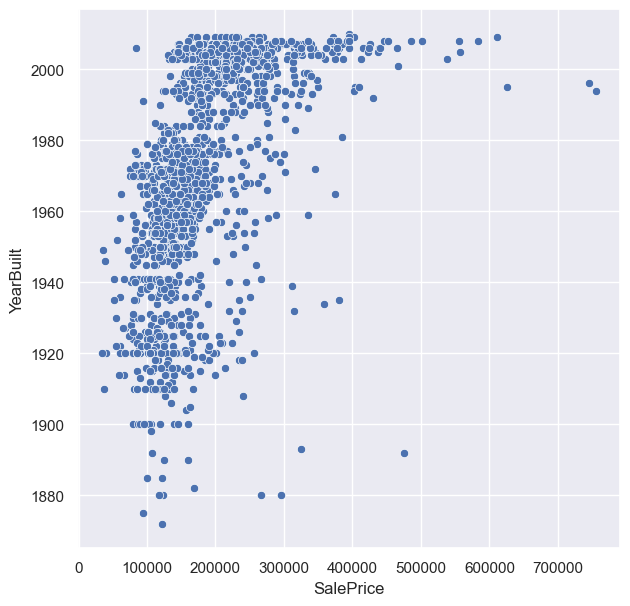

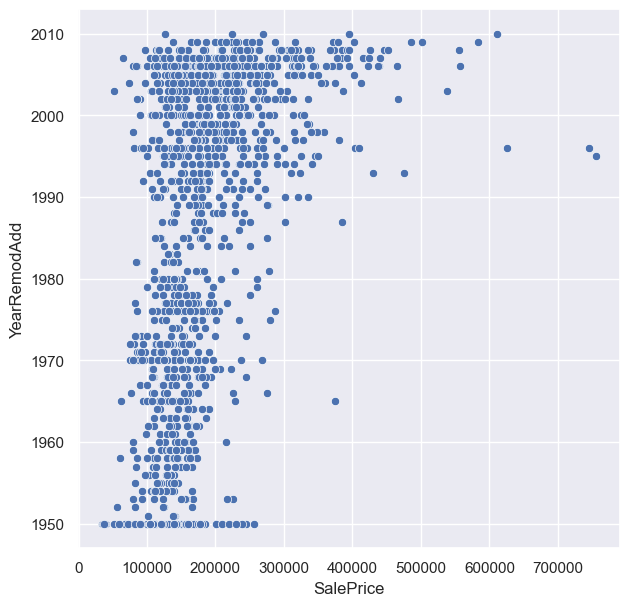

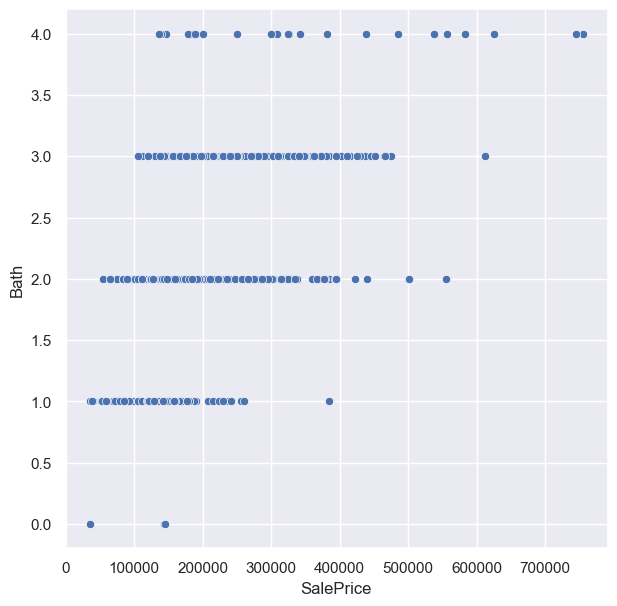

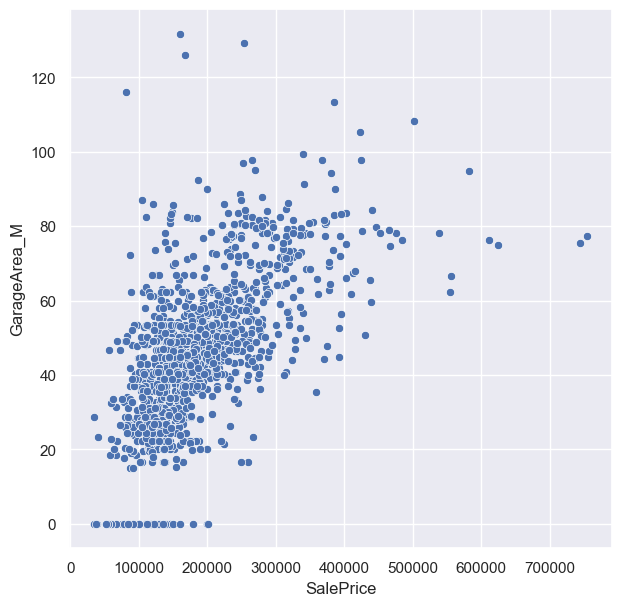

In [235]:
sns.set (rc = {'figure.figsize':(5, 5)})

for col in cols:
    plt.figure(figsize=(7,7))
    sns.scatterplot(data = digit_cols_view, x = "SalePrice", y = col)



4. Сделайте предварительные выводы.

5. Создайте дополнительные переменные из уже имеющихся, обоснуйте свои решения.

In [236]:
### из столбца DateSold можем получить признаки YearSold, MonthSold

display(data_df)
data_df['MonthSold'] = data_df['DateSold'].apply(lambda x: x.split('/')[0])
data_df['YearSold'] = data_df['DateSold'].apply(lambda x: x.split('/')[1])

data_df.drop(['DateSold'], axis=1, inplace=True)

LotArea    LotArea_M Street BldgType  OverallCond  YearBuilt  \
0        8450   785.030350   Pave     1Fam            5       2003   
1        9600   891.868800   Pave     1Fam            8       1976   
2       11250  1045.158750   Pave     1Fam            5       2001   
3        9550   887.223650   Pave     1Fam            5       1915   
4       14260  1324.796780   Pave     1Fam            5       2000   
...       ...          ...    ...      ...          ...        ...   
1455     7917   735.513051   Pave     1Fam            5       1999   
1456    13175  1223.997025   Pave     1Fam            6       1978   
1457     9042   840.028926   Pave     1Fam            9       1941   
1458     9717   902.738451   Pave     1Fam            6       1950   
1459     9937   923.177111   Pave     1Fam            6       1965   

      YearRemodAdd RoofStyle ExterQual ExterCond Foundation  TotalBsmtSF  \
0             2003     Gable        Gd        TA      PConc          856   
1             1976     Gable        TA        TA     CBlock         1262   
2             2002     Gable        Gd        TA      PConc          920   
3             1970     Gable        TA        TA     BrkTil          756   
4             2000     Gable        Gd        TA      PConc         1145   
...            ...       ...       ...       ...        ...          ...   
1455          2000     Gable        TA        TA      PConc          953   
1456          1988     Gable        TA        TA     CBlock         1542   
1457          2006     Gable        Ex        Gd      Stone         1152   
1458          1996       Hip        TA        TA     CBlock         1078   
1459          1965     Gable        Gd        TA     CBlock         1256   

      TotalBsmtSF_M Heating HeatingQC CentralAir  Bath KitchenQual  \
0         79.524968    GasA        Ex          Y     3          Gd   
1        117.243586    GasA        Ex          Y     2          TA   
2         85.470760    GasA        Ex          Y     3          Gd   
3         70.234668    GasA        Gd          Y     1          Gd   
4        106.373935    GasA        Ex          Y     3          Gd   
...             ...     ...       ...        ...   ...         ...   
1455      88.536559    GasA        Ex          Y     3          TA   
1456     143.256426    GasA        TA          Y     2          TA   
1457     107.024256    GasA        Ex          Y     2          Gd   
1458     100.149434    GasA        Gd          Y     1          Gd   
1459     116.686168    GasA        Gd          Y     2          TA   

      GarageArea  GarageArea_M DateSold SaleCondition  SalePrice  
0            548     50.910844   2/2008        Normal     208500  
1            460     42.735380   5/2007        Normal     181500  
2            608     56.485024   9/2008        Normal     223500  
3            642     59.643726   2/2006       Abnorml     140000  
4            836     77.666908  12/2008        Normal     250000  
...          ...           ...      ...           ...        ...  
1455         460     42.735380   8/2007        Normal     175000  
1456         500     46.451500   2/2010        Normal     210000  
1457         252     23.411556   5/2010        Normal     266500  
1458         240     22.296720   4/2010        Normal     142125  
1459         276     25.641228   6/2008        Normal     147500  

[1460 rows x 23 columns]

## Задание 4 

Подготовьте данные:

1. Разделите данные на тренировочную и тестовую выборки. (сделано после кодирования)

In [237]:
from sklearn.model_selection import train_test_split

dataframe = data_df
dataframe
sp = dataframe['SalePrice']
dataframe.drop(['SalePrice'], axis=1, inplace=True)
#y = data_df['SalePrice']
print(sp)

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


2. Закодируйте категориальные признаки в тренировочной и тестовой выборках.
3. Подготовьте числовые признаки в тренировочной и тестовой выборках к передаче в модель: приведите их к единому масштабу.

In [238]:
# кол-во уникальных знач в категориальных признаках
data_df.select_dtypes(include=['object']).nunique()

Street            2
BldgType          5
RoofStyle         6
ExterQual         4
ExterCond         5
Foundation        6
Heating           6
HeatingQC         5
CentralAir        2
KitchenQual       4
SaleCondition     6
MonthSold        12
YearSold          5
dtype: int64

In [239]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

CATEGORY_COLUMNS = list(dataframe.select_dtypes(include=['object']).columns)
NUM_COLUMNS = list(dataframe.select_dtypes(include=['int', 'float']).columns)
display(CATEGORY_COLUMNS)
display(NUM_COLUMNS)


# КОДИРУЕМ КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ

ohe = OneHotEncoder(sparse_output=False)
categories_df = dataframe[CATEGORY_COLUMNS]
ohe.fit(categories_df)
ohe_categories_data = ohe.transform(categories_df)
ohe_categories_df = pd.DataFrame(ohe_categories_data, columns=ohe.get_feature_names_out())
display(ohe_categories_df)

# МАСШТАБИРУЕМ ЧИСЛОВЫЕ

mms = StandardScaler()
digit_df = dataframe[NUM_COLUMNS]
mms.fit(digit_df)
mms_digits_data = mms.transform(digit_df)
mms_digits_df = pd.DataFrame(mms_digits_data,columns=mms.get_feature_names_out())
display(mms_digits_df)

final_dataframe = pd.concat(objs=[ohe_categories_df, mms_digits_df, sp], axis=1)
final_dataframe

['Street',
 'BldgType',
 'RoofStyle',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'SaleCondition',
 'MonthSold',
 'YearSold']

['LotArea',
 'LotArea_M',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 'TotalBsmtSF_M',
 'Bath',
 'GarageArea',
 'GarageArea_M']

Street_Grvl  Street_Pave  BldgType_1Fam  BldgType_2fmCon  \
0             0.0          1.0            1.0              0.0   
1             0.0          1.0            1.0              0.0   
2             0.0          1.0            1.0              0.0   
3             0.0          1.0            1.0              0.0   
4             0.0          1.0            1.0              0.0   
...           ...          ...            ...              ...   
1455          0.0          1.0            1.0              0.0   
1456          0.0          1.0            1.0              0.0   
1457          0.0          1.0            1.0              0.0   
1458          0.0          1.0            1.0              0.0   
1459          0.0          1.0            1.0              0.0   

      BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  RoofStyle_Flat  \
0                 0.0             0.0              0.0             0.0   
1                 0.0             0.0              0.0             0.0   
2                 0.0             0.0              0.0             0.0   
3                 0.0             0.0              0.0             0.0   
4                 0.0             0.0              0.0             0.0   
...               ...             ...              ...             ...   
1455              0.0             0.0              0.0             0.0   
1456              0.0             0.0              0.0             0.0   
1457              0.0             0.0              0.0             0.0   
1458              0.0             0.0              0.0             0.0   
1459              0.0             0.0              0.0             0.0   

      RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  \
0                 1.0                0.0            0.0                0.0   
1                 1.0                0.0            0.0                0.0   
2                 1.0                0.0            0.0                0.0   
3                 1.0                0.0            0.0                0.0   
4                 1.0                0.0            0.0                0.0   
...               ...                ...            ...                ...   
1455              1.0                0.0            0.0                0.0   
1456              1.0                0.0            0.0                0.0   
1457              1.0                0.0            0.0                0.0   
1458              0.0                0.0            1.0                0.0   
1459              1.0                0.0            0.0                0.0   

      RoofStyle_Shed  ExterQual_Ex  ExterQual_Fa  ExterQual_Gd  ExterQual_TA  \
0                0.0           0.0           0.0           1.0           0.0   
1                0.0           0.0           0.0           0.0           1.0   
2                0.0           0.0           0.0           1.0           0.0   
3                0.0           0.0           0.0           0.0           1.0   
4                0.0           0.0           0.0           1.0           0.0   
...              ...           ...           ...           ...           ...   
1455             0.0           0.0           0.0           0.0           1.0   
1456             0.0           0.0           0.0           0.0           1.0   
1457             0.0           1.0           0.0           0.0           0.0   
1458             0.0           0.0           0.0           0.0           1.0   
1459             0.0           0.0           0.0           1.0           0.0   

      ExterCond_Ex  ExterCond_Fa  ExterCond_Gd  ExterCond_Po  ExterCond_TA  \
0              0.0           0.0           0.0           0.0           1.0   
1              0.0           0.0           0.0           0.0           1.0   
2              0.0           0.0           0.0           0.0           1.0   
3              0.0           0.0           0.0           0.0           1.0   
4              0.0           0.0    

LotArea  LotArea_M  OverallCond  YearBuilt  YearRemodAdd  TotalBsmtSF  \
0    -0.207142  -0.207142    -0.517200   1.050994      0.878668    -0.459303   
1    -0.091886  -0.091886     2.179628   0.156734     -0.429577     0.466465   
2     0.073480   0.073480    -0.517200   0.984752      0.830215    -0.313369   
3    -0.096897  -0.096897    -0.517200  -1.863632     -0.720298    -0.687324   
4     0.375148   0.375148    -0.517200   0.951632      0.733308     0.199680   
...        ...        ...          ...        ...           ...          ...   
1455 -0.260560  -0.260560    -0.517200   0.918511      0.733308    -0.238122   
1456  0.266407   0.266407     0.381743   0.222975      0.151865     1.104925   
1457 -0.147810  -0.147810     3.078570  -1.002492      1.024029     0.215641   
1458 -0.080160  -0.080160     0.381743  -0.704406      0.539493     0.046905   
1459 -0.058112  -0.058112     0.381743  -0.207594     -0.962566     0.452784   

      TotalBsmtSF_M      Bath  GarageArea  GarageArea_M  
0         -0.459303  1.323851    0.351000      0.351000  
1          0.466465  0.065503   -0.060731     -0.060731  
2         -0.313369  1.323851    0.631726      0.631726  
3         -0.687324 -1.192845    0.790804      0.790804  
4          0.199680  1.323851    1.698485      1.698485  
...             ...       ...         ...           ...  
1455      -0.238122  1.323851   -0.060731     -0.060731  
1456       1.104925  0.065503    0.126420      0.126420  
1457       0.215641  0.065503   -1.033914     -1.033914  
1458       0.046905 -1.192845   -1.090059     -1.090059  
1459       0.452784  0.065503   -0.921624     -0.921624  

[1460 rows x 10 columns]

Street_Grvl  Street_Pave  BldgType_1Fam  BldgType_2fmCon  \
0             0.0          1.0            1.0              0.0   
1             0.0          1.0            1.0              0.0   
2             0.0          1.0            1.0              0.0   
3             0.0          1.0            1.0              0.0   
4             0.0          1.0            1.0              0.0   
...           ...          ...            ...              ...   
1455          0.0          1.0            1.0              0.0   
1456          0.0          1.0            1.0              0.0   
1457          0.0          1.0            1.0              0.0   
1458          0.0          1.0            1.0              0.0   
1459          0.0          1.0            1.0              0.0   

      BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  RoofStyle_Flat  \
0                 0.0             0.0              0.0             0.0   
1                 0.0             0.0              0.0             0.0   
2                 0.0             0.0              0.0             0.0   
3                 0.0             0.0              0.0             0.0   
4                 0.0             0.0              0.0             0.0   
...               ...             ...              ...             ...   
1455              0.0             0.0              0.0             0.0   
1456              0.0             0.0              0.0             0.0   
1457              0.0             0.0              0.0             0.0   
1458              0.0             0.0              0.0             0.0   
1459              0.0             0.0              0.0             0.0   

      RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  \
0                 1.0                0.0            0.0                0.0   
1                 1.0                0.0            0.0                0.0   
2                 1.0                0.0            0.0                0.0   
3                 1.0                0.0            0.0                0.0   
4                 1.0                0.0            0.0                0.0   
...               ...                ...            ...                ...   
1455              1.0                0.0            0.0                0.0   
1456              1.0                0.0            0.0                0.0   
1457              1.0                0.0            0.0                0.0   
1458              0.0                0.0            1.0                0.0   
1459              1.0                0.0            0.0                0.0   

      RoofStyle_Shed  ExterQual_Ex  ExterQual_Fa  ExterQual_Gd  ExterQual_TA  \
0                0.0           0.0           0.0           1.0           0.0   
1                0.0           0.0           0.0           0.0           1.0   
2                0.0           0.0           0.0           1.0           0.0   
3                0.0           0.0           0.0           0.0           1.0   
4                0.0           0.0           0.0           1.0           0.0   
...              ...           ...           ...           ...           ...   
1455             0.0           0.0           0.0           0.0           1.0   
1456             0.0           0.0           0.0           0.0           1.0   
1457             0.0           1.0           0.0           0.0           0.0   
1458             0.0           0.0           0.0           0.0           1.0   
1459             0.0           0.0           0.0           1.0           0.0   

      ExterCond_Ex  ExterCond_Fa  ExterCond_Gd  ExterCond_Po  ExterCond_TA  \
0              0.0           0.0           0.0           0.0           1.0   
1              0.0           0.0           0.0           0.0           1.0   
2              0.0           0.0           0.0           0.0           1.0   
3              0.0           0.0           0.0           0.0           1.0   
4              0.0           0.0    

## Задание 5

Займитесь обучением модели:

1. Обучите модель линейной регрессии без регуляризации. Посмотрите на веса полученной модели. Сделайте предсказания по обучающей и тестовой выборкам.

In [240]:
from sklearn.linear_model import LinearRegression


train, test = train_test_split(final_dataframe, train_size=0.7, random_state=42)

train_x = train.drop(['SalePrice'], axis=1)
train_y = train['SalePrice']

test_x = test.drop(['SalePrice'], axis=1)
test_y = test['SalePrice']


model = LinearRegression()
model.fit(train_x, train_y)

y_predict_train = model.predict(train_x)
y_predict_test = model.predict(test_x)   

print(model.score(train_x, train_y))
print(model.score(test_x, test_y))


0.7496774964726072
0.7732382199730946


In [241]:
# коэффициенты модели
print('w_0:', model.intercept_)
print('w_i:', model.coef_)

w_0: 5.3525263408965016e+16
w_i: [-1.76460644e+13 -1.76460644e+13 -1.62224029e+16 -1.62224029e+16
 -1.62224029e+16 -1.62224029e+16 -1.62224029e+16 -1.05746951e+15
 -1.05746951e+15 -1.05746951e+15 -1.05746951e+15 -1.05746951e+15
 -1.05746951e+15 -1.33689635e+16 -1.33689635e+16 -1.33689635e+16
 -1.33689635e+16 -5.31599820e+15 -5.31599820e+15 -5.31599820e+15
 -5.31599820e+15 -5.31599820e+15 -9.56079779e+12 -9.56079779e+12
 -9.56079778e+12 -9.56079778e+12 -9.56079778e+12 -9.56079778e+12
 -9.28239563e+14 -9.28239563e+14 -9.28239563e+14 -9.28239563e+14
 -9.28239563e+14 -9.28239563e+14 -1.37806352e+15 -1.37806352e+15
 -1.37806352e+15 -1.37806352e+15 -1.37806352e+15 -7.02344635e+15
 -7.02344635e+15  1.01659103e+15  1.01659103e+15  1.01659103e+15
  1.01659103e+15 -1.89242625e+15 -1.89242625e+15 -1.89242625e+15
 -1.89242625e+15 -1.89242625e+15 -1.89242625e+15 -4.67191563e+15
 -4.67191563e+15 -4.67191563e+15 -4.67191563e+15 -4.67191563e+15
 -4.67191563e+15 -4.67191563e+15 -4.67191563e+15 -4.67191

### Ваш код здесь ###

2. Понаблюдайте, как ведёт себя модель с L1-регуляризацией (Lasso). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Lasso.

In [242]:
from sklearn.linear_model import Lasso

lasso_regression = Lasso(alpha=0.004, random_state=42) # alpha — величина регуляризации

# обучение
lasso_regression.fit(train_x, train_y)

y_l1_predict_train = lasso_regression.predict(train_x)
y_l1_predict_test = lasso_regression.predict(test_x)   

print(lasso_regression.score(train_x, train_y))
print(lasso_regression.score(test_x, test_y))

0.749679060733085
0.7732127681682712


e:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.504e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


In [243]:
from sklearn.metrics import mean_squared_error


train_mse = mean_squared_error(train_y, y_l1_predict_train)
test_mse = mean_squared_error(test_y, y_l1_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 1508037928.7427611
Test MSE: 1578956289.840001


In [244]:
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(train_y, y_l1_predict_train)
test_mae = mean_absolute_error(test_y, y_l1_predict_test)
print("Train MAE: {}".format(train_mae))
print("Test MAE: {}".format(test_mae))

Train MAE: 24508.50394295215
Test MAE: 25571.648207764607


Посмотрите на веса полученной модели. Какой вывод можно сделать?

In [245]:
# коэффициенты модели
print('w_0:', lasso_regression.intercept_)
print('w_i:', lasso_regression.coef_)

w_0: 165136.30025411243
w_i: [-6.54260992e+03  2.38041358e-10  1.99103775e+04  7.68986529e+03
 -8.99163452e+03 -8.61215402e+03  4.64838796e+03  8.34757606e+03
 -1.26184233e+04 -4.60237883e+03  9.45346520e+02 -6.28345704e+03
  4.85026339e+03  3.88558962e+04  5.17280475e+03  1.75348518e+04
 -1.13704388e+03 -7.76788973e+03  2.21137930e+03 -4.73021595e+02
  8.59361765e+03 -0.00000000e+00 -6.39231367e+03 -8.60470385e+03
  1.19262303e+03  3.37943495e+03  3.42374198e+03  2.66779334e+03
 -1.50254172e+04 -2.60879644e+03  1.73260895e-04 -1.34178749e+04
  1.03603673e+04  1.28199517e+04  4.68730448e+03  6.23785996e+03
 -3.53676304e+03 -1.54737459e+04  1.03665887e+03 -8.36491974e+03
  1.39762658e-09  7.07177541e+04 -1.35996015e+03  1.02128301e+04
 -1.53481794e+03 -4.44360652e+03  8.64950344e+03  7.01391132e+04
 -8.33653825e+03 -1.48486930e+03  1.26781770e+03 -1.17715465e+04
 -4.96929650e+03  2.79086324e+03  1.60157310e+03 -8.93898825e+03
  8.86576692e+02 -3.81648478e+03  3.32037996e+02 -3.73895035e

In [246]:
coef = []
for i in range(-4, 5):
  alpha = 10**i
  lasso_regression = Lasso(alpha=alpha) # alpha — величина регуляризации

  # обучение
  lasso_regression.fit(train_x, train_y)

  coef.append(list(lasso_regression.coef_))

  # вывод точности предсказания
  print('-'*5, 'lambda =', alpha, '-'*5)
  print(lasso_regression.score(train_x, train_y))
  print(lasso_regression.score(test_x, test_y))

----- lambda = 0.0001 -----
0.7496790607564425
0.7732123934141572


e:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.504e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


e:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.504e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(
e:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.504e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


----- lambda = 0.001 -----
0.7496790607550403
0.7732124703308075
----- lambda = 0.01 -----
0.7496790606103838
0.7732133430821833


e:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.504e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


----- lambda = 0.1 -----
0.7496790461491645
0.7732219614929743
----- lambda = 1 -----
0.7496776615032271
0.7732759892264623
----- lambda = 10 -----
0.7495546170007696
0.7738315037901455
----- lambda = 100 -----
0.7475528756395401
0.7769230823037836
----- lambda = 1000 -----
0.7311119301891307
0.7733073924627678
----- lambda = 10000 -----
0.6063226623392381
0.6439126614175877


e:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.908e+10, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


Наиболее удачный параметр alpha = 0.004

3. Понаблюдайте, как ведёт себя модель с L2-регуляризацией (Ridge). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Ridge.

In [247]:
from sklearn.linear_model import Ridge
ridge_regression = Ridge(alpha=14) 

ridge_regression.fit(train_x, train_y)

print(ridge_regression.score(train_x, train_y))
print(ridge_regression.score(test_x, test_y))

0.7454743529388783
0.7856098290754759


Посмотрите на веса полученной модели. Какой вывод можно сделать?

In [248]:
print('w_0:', ridge_regression.intercept_)
print('w_i:', ridge_regression.coef_)

w_0: 196002.82196823336
w_i: [-2.15830718e+03  2.15830718e+03  1.47151837e+04  4.54523603e+02
 -6.69575003e+03 -8.79512577e+03  3.21168505e+02  6.42317616e+03
 -1.00413080e+04 -2.90822463e+02  4.33976418e+03 -8.61264331e+02
  4.30454489e+02  1.95621205e+04 -5.14404368e+03  1.84007790e+03
 -1.62581547e+04 -1.32425750e+03  1.37818573e+03 -6.10897011e+01
  3.81915505e+02 -3.74754039e+02 -3.69505862e+03 -7.44593091e+03
  3.22687435e+03  6.16405284e+03  1.47884939e+03  2.71212948e+02
 -6.74276223e+02 -8.23431971e+02  5.06090611e+02 -2.66198364e+03
  1.74776672e+03  1.90583451e+03  3.26999841e+03  3.03007258e+03
 -4.73283086e+03 -8.69127215e+02 -6.98112911e+02 -4.21220707e+03
  4.21220707e+03  4.06530713e+04 -1.22063797e+04 -9.63869161e+03
 -1.88080000e+04 -6.30023999e+03  6.89353551e+02  1.67044863e+04
 -7.02004473e+03 -4.54878719e+03  4.75232095e+02 -7.14438522e+03
 -2.66235203e+03  3.27688007e+03  1.93784410e+03 -4.77425086e+03
  2.38484030e+03 -1.34816739e+03  1.30583537e+03 -1.65006262e

In [249]:
coef = []
for i in range(-4, 5):
  alpha = 10**i
  ridge_regression = Ridge(alpha=alpha) # alpha — величина регуляризации

  # обучение
  ridge_regression.fit(train_x, train_y)

  coef.append(list(ridge_regression.coef_))

  # вывод точности предсказания
  print('-'*5, 'lambda =', alpha, '-'*5)
  print(ridge_regression.score(train_x, train_y))
  print(ridge_regression.score(test_x, test_y))

----- lambda = 0.0001 -----
0.7496790607536035
0.7732129290556877
----- lambda = 0.001 -----
0.7496790604713688
0.773217825138853
----- lambda = 0.01 -----
0.7496790324840332
0.7732666273744395
----- lambda = 0.1 -----
0.749676447329309
0.7737393411652047
----- lambda = 1 -----
0.7495249491121818
0.7773246368008184
----- lambda = 10 -----
0.7466896880798317
0.7853377890062183
----- lambda = 100 -----
0.7262716422215103
0.7696036393469273
----- lambda = 1000 -----
0.6537221676949467
0.6757528941354862
----- lambda = 10000 -----
0.3449415041584045
0.3366199735859938


Лучшее значение alpha = 14

## Задание 6

Ответьте на следующие вопросы:

1. В последней обученной модели выберите три признака с наибольшими положительными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем больше сумма сделки?

In [253]:
# коэффициенты модели
print('w_0:', ridge_regression.intercept_)

coef = list(ridge_regression.coef_)
coefs = []
for i in range(len(coef)):
  coefs.append((i,train_x.columns[i],coef[i]))
  #print(f'w_{i+1}:', coef[i], train_x.columns[i])
coefs.sort(key=lambda a: a[2], reverse=True)
print(coefs)

w_0: 181248.34127358653
[(77, 'GarageArea_M', 3255.416821866326), (76, 'GarageArea', 3255.4168218663253), (73, 'TotalBsmtSF', 3231.4746393950186), (74, 'TotalBsmtSF_M', 3231.4746393950186), (75, 'Bath', 3203.8117600996306), (72, 'YearRemodAdd', 2771.1541414473973), (71, 'YearBuilt', 2683.2095824799235), (68, 'LotArea', 1572.0277100800147), (69, 'LotArea_M', 1572.027710080014), (24, 'Foundation_PConc', 1295.0601397013222), (34, 'HeatingQC_Ex', 1242.4321994329894), (15, 'ExterQual_Gd', 1167.3804072290689), (43, 'KitchenQual_Gd', 803.0968114992909), (41, 'KitchenQual_Ex', 778.9587756108809), (10, 'RoofStyle_Hip', 590.2991079253403), (50, 'SaleCondition_Partial', 535.2633434409765), (13, 'ExterQual_Ex', 464.65586041537296), (40, 'CentralAir_Y', 378.36085543584994), (2, 'BldgType_1Fam', 374.5191994723503), (21, 'ExterCond_TA', 204.23975934484307), (64, 'YearSold_2007', 130.55519425036525), (60, 'MonthSold_7', 102.36621366840369), (29, 'Heating_GasA', 71.05468905144284), (62, 'MonthSold_9', 

In [256]:
plt.scatter(final_dataframe['GarageArea_M'], final_dataframe['SalePrice'])
#plt.xlabel('предсказанное значение y_predict')
#plt.ylabel('реальное значение y')
plt.show()

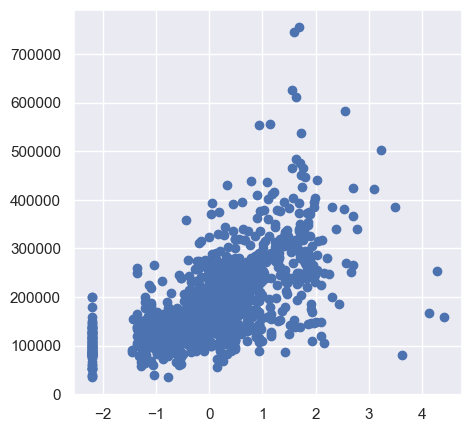

In [257]:
plt.scatter(final_dataframe['GarageArea'], final_dataframe['SalePrice'])
plt.show()

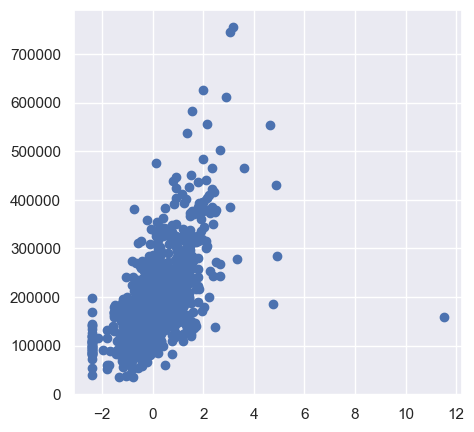

In [258]:

plt.scatter(final_dataframe['TotalBsmtSF'], final_dataframe['SalePrice'])
plt.show()

Вывод - да.

Изучив графики можно прийти к выводу что в среднем чем выше значения признаков с наивысшим коэффициентом тем выше сумма сделки

2. В последней обученной модели выберите три признака с наибольшими отрицательными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем меньше сумма сделки?

In [259]:
plt.scatter(final_dataframe['ExterQual_TA'], final_dataframe['SalePrice'])
plt.show()

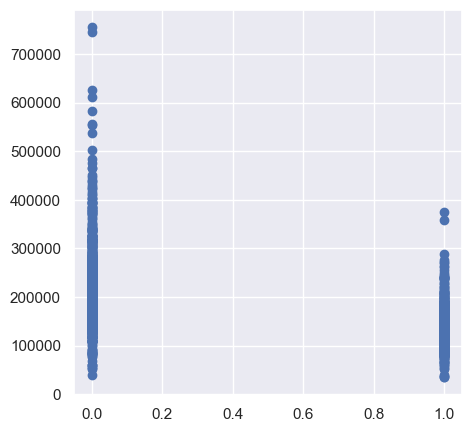

In [260]:
plt.scatter(final_dataframe['KitchenQual_TA'], final_dataframe['SalePrice'])
plt.show()

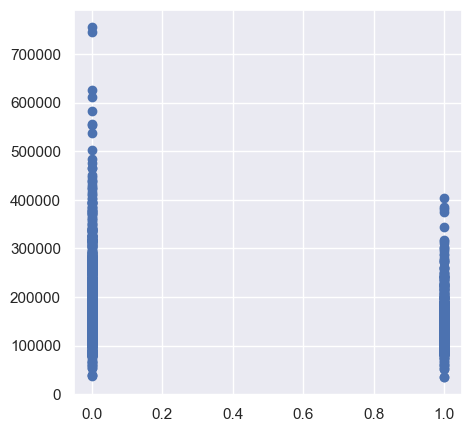

In [261]:
plt.scatter(final_dataframe['Foundation_CBlock'], final_dataframe['SalePrice'])
plt.show()

Вывод - да.

Изучив графики можно прийти к выводу что в среднем у объектов где признаки с наименьшими коэффициентами равны одному у тех объектов ниже сумма сделки

3. В модели Lasso выберите три признака с нулевыми коэффициентами. Как вы думаете, почему модель их исключила? Можно ли смело утверждать, что сумма сделки от этих признаков не зависит?

Какие признаки выберет модель для исключения зависит от величины регуляризации, если влияние признаков на функцию ниже заданной величины, то модель отключит их.

Подобрать нужную величину можно опытным путем, как и сделано в заданиях

## Заключение

В этом модуле с помощью регуляризации вы научились обучать модели линейной регрессии с регуляризацией, подбирать коэффициент регуляризации alpha, а также отбирать признаки с помощью L1-регуляризации. 